In [9]:
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline

# Selecting optimal biases
## Investigating the expected variance of $\Delta f$ as a function of $\zeta$

The likelihood of the binomial distribution for $n$ success out of $N$ samples given by 

$$ f(n | \Delta f, \zeta) = {{N}\choose{n}} p(\Delta f, \zeta)^n \, (1 - p(\Delta f, \zeta))^{N - n}$$

where

$$ p(\Delta f, \zeta) = \frac{1}{1 + \exp(\Delta f - \zeta)} $$

which is the logisitic function.

If $\Delta f$ is the unkown parameter of interest, and we can sample from $f(n | \Delta f, \zeta)$ at any value of $\zeta$ we want, the question I'd like to answer is: what value of $\zeta$ should one choose to sampled from in order to obtain the best estimate of $\Delta f$?

One approach is the exploit the Cramer-Rao lower bound for the variance of $\Delta f$:

$$ \text{Var}(\Delta f|\zeta) \geq \frac{1}{I(\Delta f|\zeta)} $$

where $I(\Delta f|\zeta)$ is the Fischer information of $f(n | \Delta f, \zeta)$, and is given by

$$ I(\Delta f|\zeta) = \mathop{\mathbb{E}} \left [ \left (\frac{\partial}{\partial \Delta f }\log(f(n | \Delta f, \zeta)) \right)^2\right]$$

After a some alegrebra, this can be shown to be

$$ I(\Delta f|\zeta) = \frac{n}{p(\Delta f, \zeta)(1-p(\Delta f, \zeta))}$$

such that

$$\text{Var}(\Delta f|\zeta) \geq \frac{p(\Delta f, \zeta)(1-p(\Delta f, \zeta))}{N} $$

The lower bound has the form $x(1-x)$, which, by inspection, has a maximum at x=0.5. This implies that the variance is maximized at $\zeta = \Delta f$ because $p(\Delta f, \zeta)$ is the logistic function. To confirm this, we can see what this looks like by plotting the Cramer-Rao lower bound as a function of $\zeta$.

Defining a couple of functions will be defined first:

In [33]:
def logistic(f,zeta):
    """
    The logistict function, which is the probability for observing one success in the above model. 
    """
    return 1/(1 + np.exp(f - zeta))

def var_lower_bound(f,zeta,N=10):
    """
    The Cramer Rao lower bound of the variance in the binomial likelihood.
    """
    return logistic(f, zeta)*(1 - logistic(f, zeta))/N

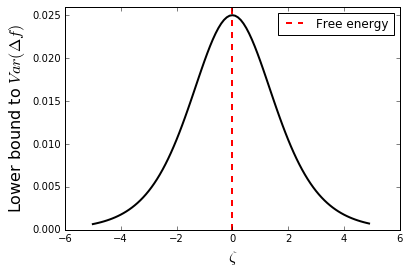

In [43]:
# Defining the parameters:
f = 0
N = 10
zetas = np.arange(-5, 5,0.1)

# Calculating the Cramer-Rao lower bound
v = var_lower_bound(f=f, zeta = zetas,N=N)

# Plotting
plt.plot(zetas, v, lw=2, color='k')
plt.axvline(f, color='red', lw=2, ls='--', label='Free energy')
plt.ylim((0, np.max(v)+0.01/N ))
plt.ylabel('Lower bound to $Var(\Delta f)$', fontsize = 16)
plt.xlabel('$\zeta$', fontsize = 16)
plt.legend()
plt.show()

This confirms the assertion above that the variance is at a maximum when $\Delta f = \zeta$. 

## Optimal samples from maximum variance
Returing the central question, where should one sample from in order to minimize the uncertainty in $\Delta f$? In other words, which samples decrease the variance the most? With an estimate for the variance, given by the Cramer-Rao lower bound, we can see the rate of change of the varaince with respect to samples is given by

$$ \frac{\partial \text{Var}(\Delta f|\zeta) }{\partial N} \geq \frac{-1}{N} \text{Var}(\Delta f|\zeta)$$

The most important aspect of this equation is that it is negative with respect to samples: the more samples one draws, the more the variance decrases. In addition, samples drawn from the value of $\zeta$ that maximimises $text{Var}(\Delta f|\zeta)$, also decrease the variance the most thanks to the minus sign. Samples drawn from any other value of $\zeta$ will have a lower gradient in the varaince.

In [ ]:
`